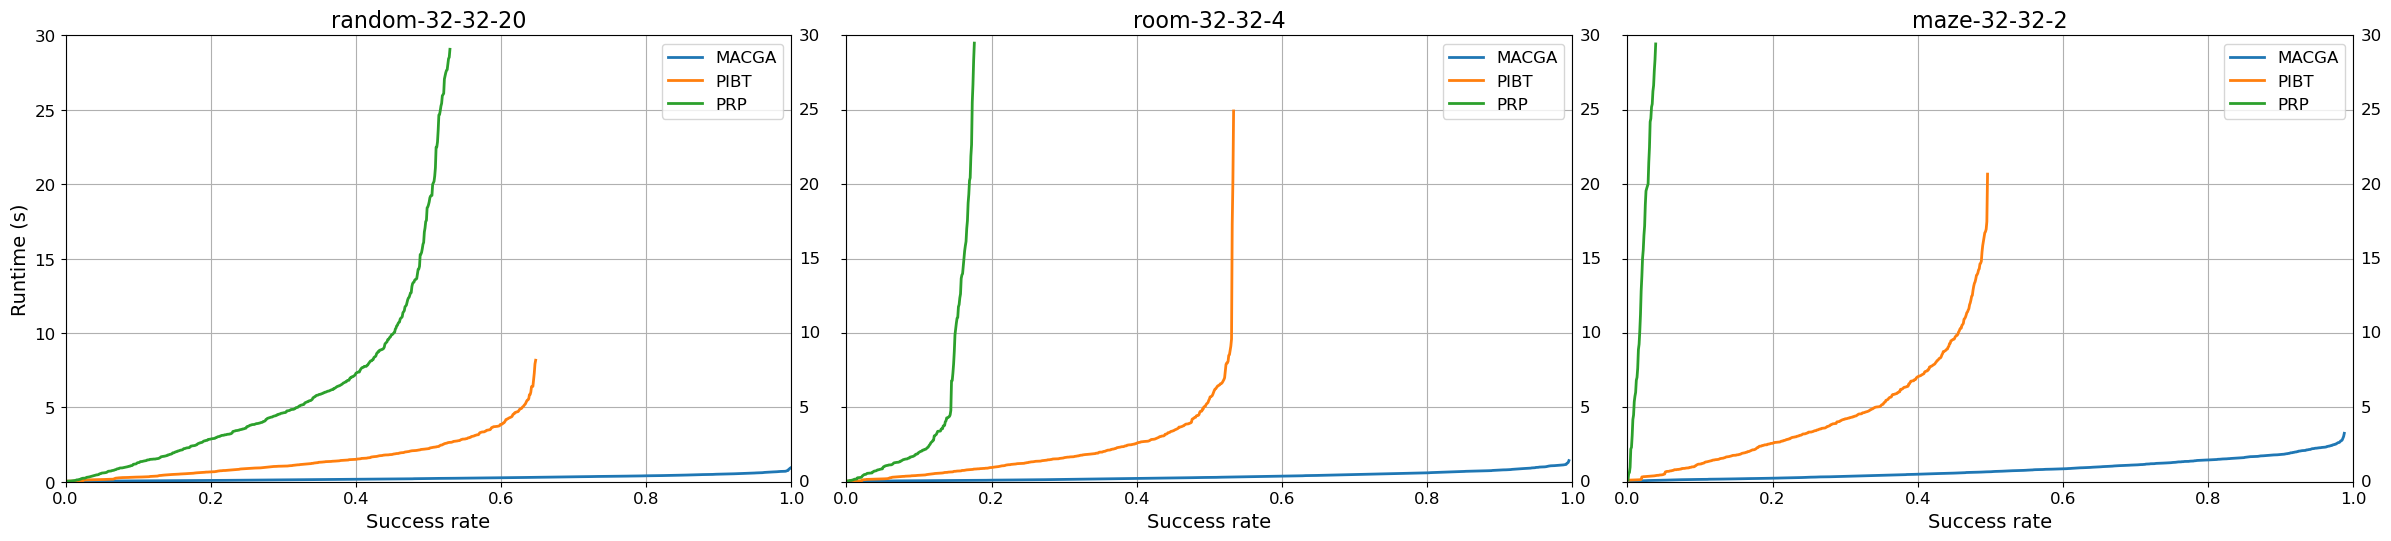

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Define global constants
ACTIVE_AGENTS = 50  # number of active agents to filter on

# File paths per algorithm
file_paths = {
    'MACGA': 'combined_MACGA.csv',
    'PIBT': 'combined_PIBT.csv',
    'PRP': 'combined_PRP.csv'
}

# Helper function for success rate X-axis
def get_success_x(total_count, count):
    return [i / total_count for i in range(1, count + 1)]

# Get all unique maps
all_maps = ["random-32-32-20", "room-32-32-4", "maze-32-32-2"]

# Prepare subplots: one per map, in a row
fig, axes = plt.subplots(1, len(all_maps), figsize=(8 * len(all_maps), 6), sharey=True)
if len(all_maps) == 1:
    axes = [axes]  # Ensure axes is always iterable

for ax, map_name in zip(axes, all_maps):
    for algo, path in file_paths.items():
        df = pd.read_csv(path) if path.endswith('.csv') else pd.read_excel(path)
        total_trials = df[(df['map_name'] == map_name)].shape[0]
        df_filtered = df[(df['map_name'] == map_name) & (~df['runtime'].isna())]
        if total_trials == 0 or len(df_filtered) == 0:
            continue
        runtimes = df_filtered['runtime'].sort_values().reset_index(drop=True)
        x = get_success_x(total_trials, len(runtimes))
        ax.plot(x, runtimes, label=algo, linewidth=2)
    ax.set_title(f'{map_name}', fontsize=16)
    ax.set_xlabel('Success rate', fontsize=14)
    ax.set_xlim(0, 1)
    ax.set_xticks([round(i * 0.2, 2) for i in range(6)])
    ax.set_ylim(0, 30)
    ax.set_yticks(range(0, 31, 5))
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=12)
    # Add vertical y-axis value labels
    for y in range(0, 31, 5):
        ax.text(1.01, y, str(y), va='center', ha='left', fontsize=12, transform=ax.get_yaxis_transform())
    if ax == axes[0]:
        ax.set_ylabel('Runtime (s)', fontsize=14)
    ax.legend(fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
